# 绘制地理投影图的时候坐标的设置

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter,LatitudeLocator

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
ds = xr.open_dataset('../../data/sst.mnmean.nc')
sst2017=ds['sst'].loc['20170701',:,:]
sst2017

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 2017-07-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [3]:
lon=sst2017['lon'][:].data
lat =sst2017['lat'][:].data

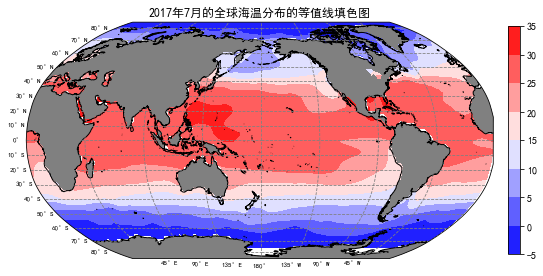

In [4]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
# 添加海岸线和陆地
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAND,facecolor='grey')
"""# 添加坐标轴
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter(auto_hide=False)
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置刻度大小
ax.tick_params(axis='y',labelsize=10)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')"""
#####################################设置部分##############################
# 设置坐标刻度
ZB=ax.gridlines(crs=ccrs.PlateCarree(),color='grey',draw_labels=True,linestyle='--',linewidth=0.8)
ZB.xlocator = mticker.FixedLocator([45,90,135, 180, -135, -90,-45])
ZB.ylocator = mticker.FixedLocator(np.arange(-80,90,10))
# 设置刻度的显示开关
ZB.top_labels=False
ZB.right_labels=False
ZB.left_labels=True
ZB.bottom_labels=True
# 设置经纬度样式
ZB.xlabel_style={'size':7}
ZB.ylabel_style={'size':7}
ZB.rotate_labels=0 # 旋转坐标刻度
############################################################################
# 设置标题
ax.set_title('2017年7月的全球海温分布的等值线填色图')

# 画图
colorbar=ax.contourf(lon,lat,sst2017.data,cmap='bwr',transform=ccrs.PlateCarree())
plt.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.04, shrink=0.7)